In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20) #Change the value to display more rows.
plt.style.use('seaborn-v0_8-darkgrid')

#Importing dataset

In [2]:
assay = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\ASSAY.xlsx", sheet_name = 'ASSAY')
lithology = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\LITHOLOGY.xlsx", sheet_name = 'LITOLOGI')

#Merging tables

In [3]:
# Each BHID has interval of assay and lithology.
df1= assay.merge(lithology, how = 'inner', on = ['BHID','DEPTH_FROM','DEPTH_TO'])
df1.set_index('BHID')

,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
BHID,,,,,,,,,,,
DHP001,0.00,1.00,1.00,0.50,0.05,46.20,2.40,1.50,DHP001_1,1.00,WASTE
DHP001,1.00,2.00,1.00,0.72,0.05,44.40,2.60,1.60,DHP001_2,1.00,WASTE
DHP001,2.00,3.00,1.00,0.89,0.06,44.80,3.00,1.60,DHP001_3,1.00,WASTE
DHP001,3.00,4.00,1.00,0.98,0.07,45.40,2.70,1.30,DHP001_4,1.00,WASTE
DHP001,4.00,5.00,1.00,0.90,0.06,43.90,2.70,1.30,DHP001_5,1.00,WASTE
...,...,...,...,...,...,...,...,...,...,...,...
DHP125,10.00,10.85,0.85,1.11,0.14,42.60,17.00,3.70,DHP125_10.85,0.85,WASTE
DHP125,10.85,11.00,0.15,0.69,0.04,6.50,42.10,34.80,DHP125_11,0.15,BZ
DHP125,11.00,12.00,1.00,0.95,0.06,8.22,40.26,33.58,DHP125_12,1.00,BZ


#Where is the highest Ni value of all samples?

In [4]:
df1.sort_values(by=['Ni'],ascending=[False])
# DHP075 between 14.0 and 14.75 shows the highest Ni.

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
1912,DHP075,14.0,14.75,0.75,4.61,0.20,10.10,39.5,23.10,DHP075_14.75,0.75,ORE
818,DHP032,7.0,8.00,1.00,4.28,0.18,12.90,34.1,23.20,DHP032_8,1.00,WASTE
2649,DHP101,12.0,13.00,1.00,4.18,2.35,30.40,12.3,3.10,DHP101_13,1.00,ORE
860,DHP033,24.6,25.00,0.40,3.93,0.22,17.40,33.2,20.00,DHP033_25,0.40,ORE
1364,DHP052,14.0,14.35,0.35,3.93,0.12,11.28,37.9,26.74,DHP052_14.35,0.35,ORE
...,...,...,...,...,...,...,...,...,...,...,...,...
1701,DHP067,0.0,1.00,1.00,0.13,0.00,23.50,1.3,0.60,DHP067_1,1.00,WASTE
2136,DHP083,2.0,3.00,1.00,0.13,0.01,13.30,0.8,0.05,DHP083_3,1.00,WASTE
1702,DHP067,1.0,2.00,1.00,0.12,0.01,23.90,1.1,0.40,DHP067_2,1.00,WASTE
1704,DHP067,3.0,4.00,1.00,0.11,0.03,20.30,5.3,0.30,DHP067_4,1.00,WASTE


#Case study, company wanted to look deeper into DHP075

In [5]:
# Showing only BHID DHP075.
DHP075 = df1[df1['BHID'].str.contains('DHP075')]
DHP075

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
1897,DHP075,0.0,1.0,1.0,0.46,0.00,47.30,1.80,0.80,DHP075_1,1.0,WASTE
1898,DHP075,1.0,2.0,1.0,0.82,0.01,46.70,1.30,0.40,DHP075_2,1.0,WASTE
1899,DHP075,2.0,3.0,1.0,0.65,0.01,49.00,1.30,0.30,DHP075_3,1.0,WASTE
1900,DHP075,3.0,4.0,1.0,0.78,0.06,49.60,1.70,0.30,DHP075_4,1.0,WASTE
1901,DHP075,4.0,5.0,1.0,0.73,0.03,50.80,1.50,0.20,DHP075_5,1.0,WASTE
...,...,...,...,...,...,...,...,...,...,...,...,...
1919,DHP075,18.0,19.0,1.0,1.72,0.22,12.30,59.60,8.40,DHP075_19,1.0,ORE
1920,DHP075,19.0,20.0,1.0,2.06,0.12,11.00,56.80,13.80,DHP075_20,1.0,ORE
1921,DHP075,20.0,21.0,1.0,1.21,0.02,6.68,48.49,28.80,DHP075_21,1.0,ORE
1922,DHP075,21.0,22.0,1.0,0.44,0.01,6.54,44.47,32.02,DHP075_22,1.0,BZ


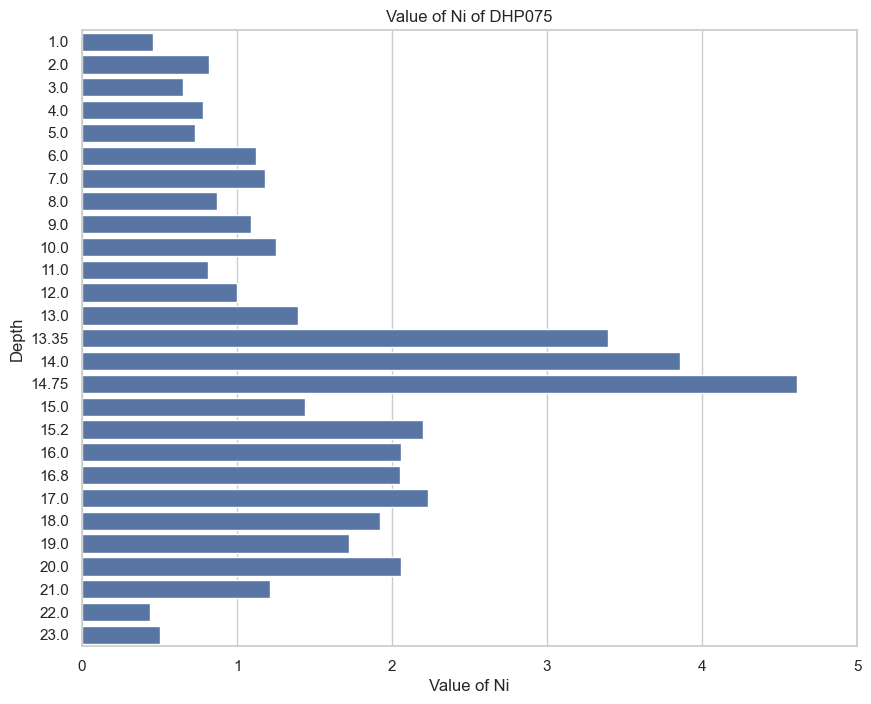

In [134]:
# Creating horizontal bar plot
f, ax = plt.subplots(figsize=(10, 8))
sbn.set_theme(style="whitegrid")
plt.title("Value of Ni of DHP075")
sbn.set_context('notebook', font_scale=1)
sbn.barplot(data=DHP075, x = 'Ni', y='DEPTH_TO', color='b', orient='h', width=0.8)

# Axis label
ax.set(xlim=(0, 5), ylabel="Depth", xlabel="Value of Ni")

plt.show()

In [6]:
# Overview of DHP075
DHP075.groupby('LIT').describe()

DEPTH_FROM                                                         \
           count       mean       std   min      25%   50%    75%   max   
LIT                                                                       
BZ           2.0  21.500000  0.707107  21.0  21.2500  21.5  21.75  22.0   
ORE         12.0  16.008333  2.212858  13.0  14.5625  15.6  17.25  20.0   
WASTE       13.0   6.000000  3.894440   0.0   3.0000   6.0   9.00  12.0   

      DEPTH_TO                                                      INTERVAL  \
         count    mean       std    min      25%   50%    75%   max    count   
LIT                                                                            
BZ         2.0  22.500  0.707107  22.00  22.2500  22.5  22.75  23.0      2.0   
ORE       12.0  16.675  2.419570  13.35  14.9375  16.4  18.25  21.0     12.0   
WASTE     13.0   7.000  3.894440   1.00   4.0000   7.0  10.00  13.0     13.0   

                                                         Ni            \
           mean      std  min    25%    50%  75%  max count      mean   
LIT                                                                     
BZ     1.000000  0.00000  1.0  1.000  1.000  1.0  1.0   2.0  0.470000   
ORE    0.666667  0.32983  0.2  0.325  0.775  1.0  1.0  12.0  2.395833   
WASTE  1.000000  0.00000  1.0  1.000  1.000  1.0  1.0  13.0  0.934615   

                                                   Co                      \
            std   min    25%   50%    75%   max count      mean       std   
LIT                                                                         
BZ     0.042426  0.44  0.455  0.47  0.485  0.50   2.0  0.015000  0.007071   
ORE    1.020191  1.21  1.870  2.06  2.520  4.61  12.0  0.103333  0.080491   
WASTE  0.263743  0.46  0.780  0.87  1.120  1.39  13.0  0.043846  0.031764   

                                            Fe                              \
        min     25%    50%     75%   max count       mean       std    min   
LIT                                                                          
BZ     0.01  0.0125  0.015  0.0175  0.02   2.0   6.605000  0.091924   6.54   
ORE    0.02  0.0375  0.070  0.1925  0.22  12.0  11.159167  4.089180   5.80   
WASTE  0.00  0.0200  0.040  0.0600  0.11  13.0  47.307692  3.436437  39.40   

                                        SiO2                              \
           25%     50%      75%    max count       mean       std    min   
LIT                                                                        
BZ      6.5725   6.605   6.6375   6.67   2.0  45.145000  0.954594  44.47   
ORE     8.1950  10.550  14.3075  17.70  12.0  45.426667  6.698565  36.73   
WASTE  47.2000  47.500  49.0000  52.00  13.0   2.892308  2.830625   1.30   

                                         MgO                              \
           25%     50%      75%    max count       mean       std    min   
LIT                                                                        
BZ     44.8075  45.145  45.4825  45.82   2.0  31.775000  0.346482  31.53   
ORE    42.0750  43.500  46.6225  59.60  12.0  21.604167  8.167632   8.40   
WASTE   1.7000   1.800   3.0000  12.00  13.0   0.576923  0.491857   0.20   

                                       THICKNESS                          \
           25%     50%      75%    max     count      mean      std  min   
LIT                                                                        
BZ     31.6525  31.775  31.8975  32.02       2.0  1.000000  0.00000  1.0   
ORE    14.0250  22.400  28.9500  33.30      12.0  0.666667  0.32983  0.2   
WASTE   0.3000   0.400   0.8000   1.90      13.0  1.000000  0.00000  1.0   

                               
         25%    50%  75%  max  
LIT                            
BZ     1.000  1.000  1.0  1.0  
ORE    0.325  0.775  1.0  1.0  
WASTE  1.000  1.000  1.0  1.0

In [8]:
# Sorting DHP075 from highest value of Ni
DHP075.sort_values(by=['Ni'],ascending = [False])

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
1912,DHP075,14.00,14.75,0.75,4.61,0.20,10.10,39.50,23.10,DHP075_14.75,0.75,ORE
1911,DHP075,13.35,14.00,0.65,3.86,0.19,9.80,44.90,21.70,DHP075_14,0.65,ORE
1910,DHP075,13.00,13.35,0.35,3.39,0.21,14.63,36.73,23.55,DHP075_13.35,0.35,ORE
1917,DHP075,16.80,17.00,0.20,2.23,0.02,8.70,42.40,29.40,DHP075_17,0.20,ORE
1914,DHP075,15.00,15.20,0.20,2.20,0.05,5.80,42.30,31.80,DHP075_15.2,0.20,ORE
...,...,...,...,...,...,...,...,...,...,...,...,...
1901,DHP075,4.00,5.00,1.00,0.73,0.03,50.80,1.50,0.20,DHP075_5,1.00,WASTE
1899,DHP075,2.00,3.00,1.00,0.65,0.01,49.00,1.30,0.30,DHP075_3,1.00,WASTE
1923,DHP075,22.00,23.00,1.00,0.50,0.02,6.67,45.82,31.53,DHP075_23,1.00,BZ
1897,DHP075,0.00,1.00,1.00,0.46,0.00,47.30,1.80,0.80,DHP075_1,1.00,WASTE


In [9]:
# Average value of assay result in DHP075.
exclude = ['DEPTH_FROM','DEPTH_TO', 'THICKNESS', 'INTERVAL', 'SAMID', 'BHID', 'LIT']
DHP075.loc[:, df1.columns.difference(exclude)].mean()

Co       0.068148
Fe      28.226667
MgO     12.233333
Ni       1.549630
SiO2    24.926296
dtype: float64

In [10]:
# Max value of assay result in DHP075.
DHP075.loc[:, df1.columns.difference(exclude)].max()

Co       0.22
Fe      52.00
MgO     33.30
Ni       4.61
SiO2    59.60
dtype: float64

In [11]:
# Min value of assay result in DHP075.
DHP075.loc[:, df1.columns.difference(exclude)].min()

Co      0.00
Fe      5.80
MgO     0.20
Ni      0.44
SiO2    1.30
dtype: float64

#More insight into DHP075

In [17]:
plot075 = DHP075[['DEPTH_TO','Ni','Fe','Co','SiO2','MgO','LIT']]
plot075.set_index('DEPTH_TO',inplace=True)

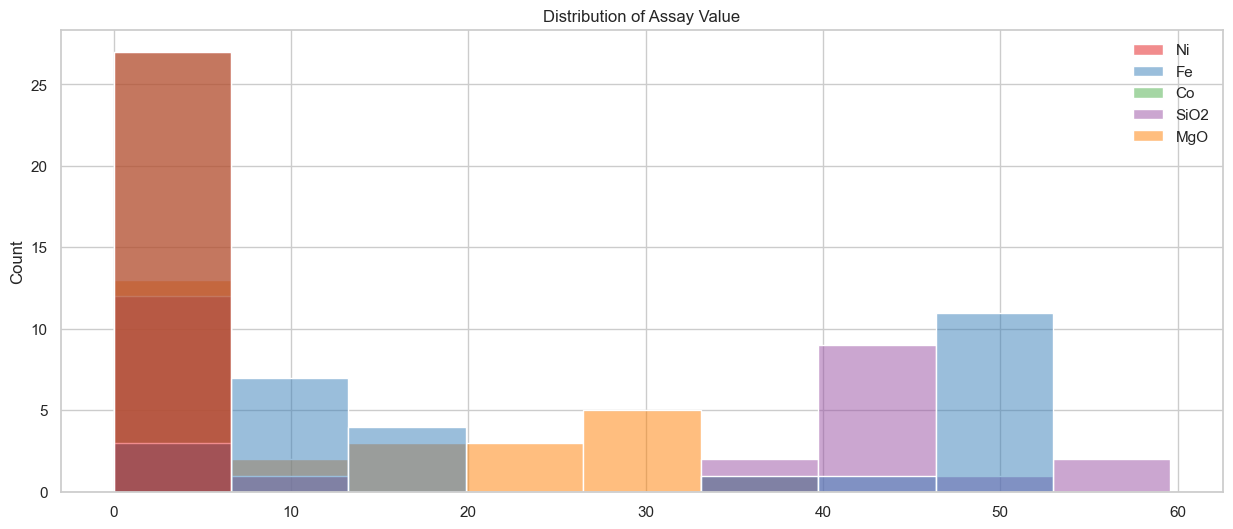

In [107]:
# Creating histogram
import matplotlib as mpl
sbn.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
sbn.histplot(data=plot075, palette='Set1')
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([10, 20, 30, 40, 50, 60])
plt.title("Distribution of Assay Value")
plt.show()

Histogram to show data distribution of all the assay value.

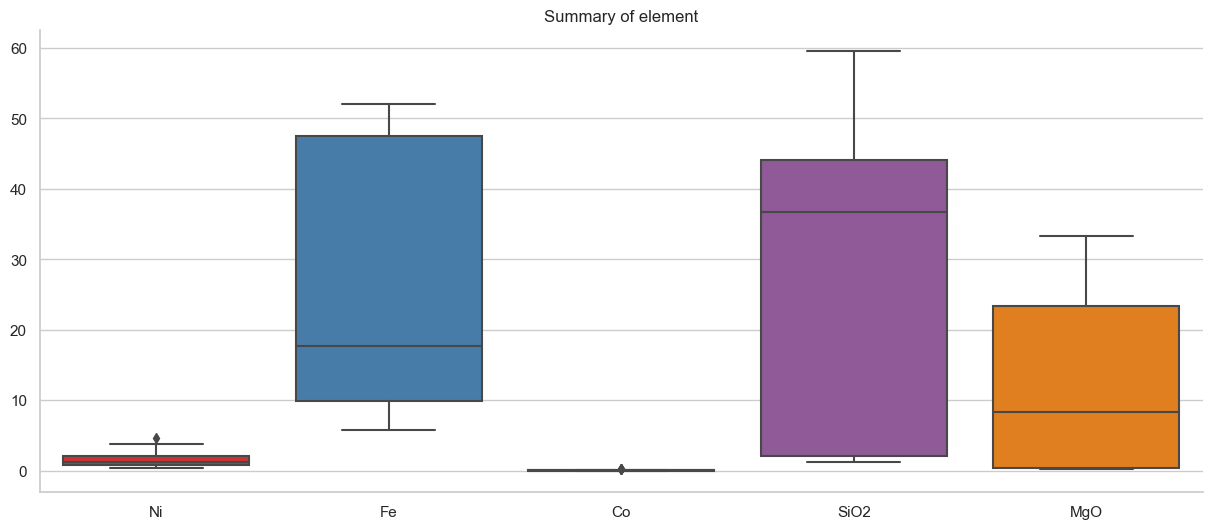

In [142]:
# Creating boxplot
sbn.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
plt.title("Summary of element")
sbn.boxplot(palette='Set1', data=plot075)
sbn.despine()

By using the boxplot above, company can see the five-number-summary of all the lab results of DHP075. Note the dots are outliers.

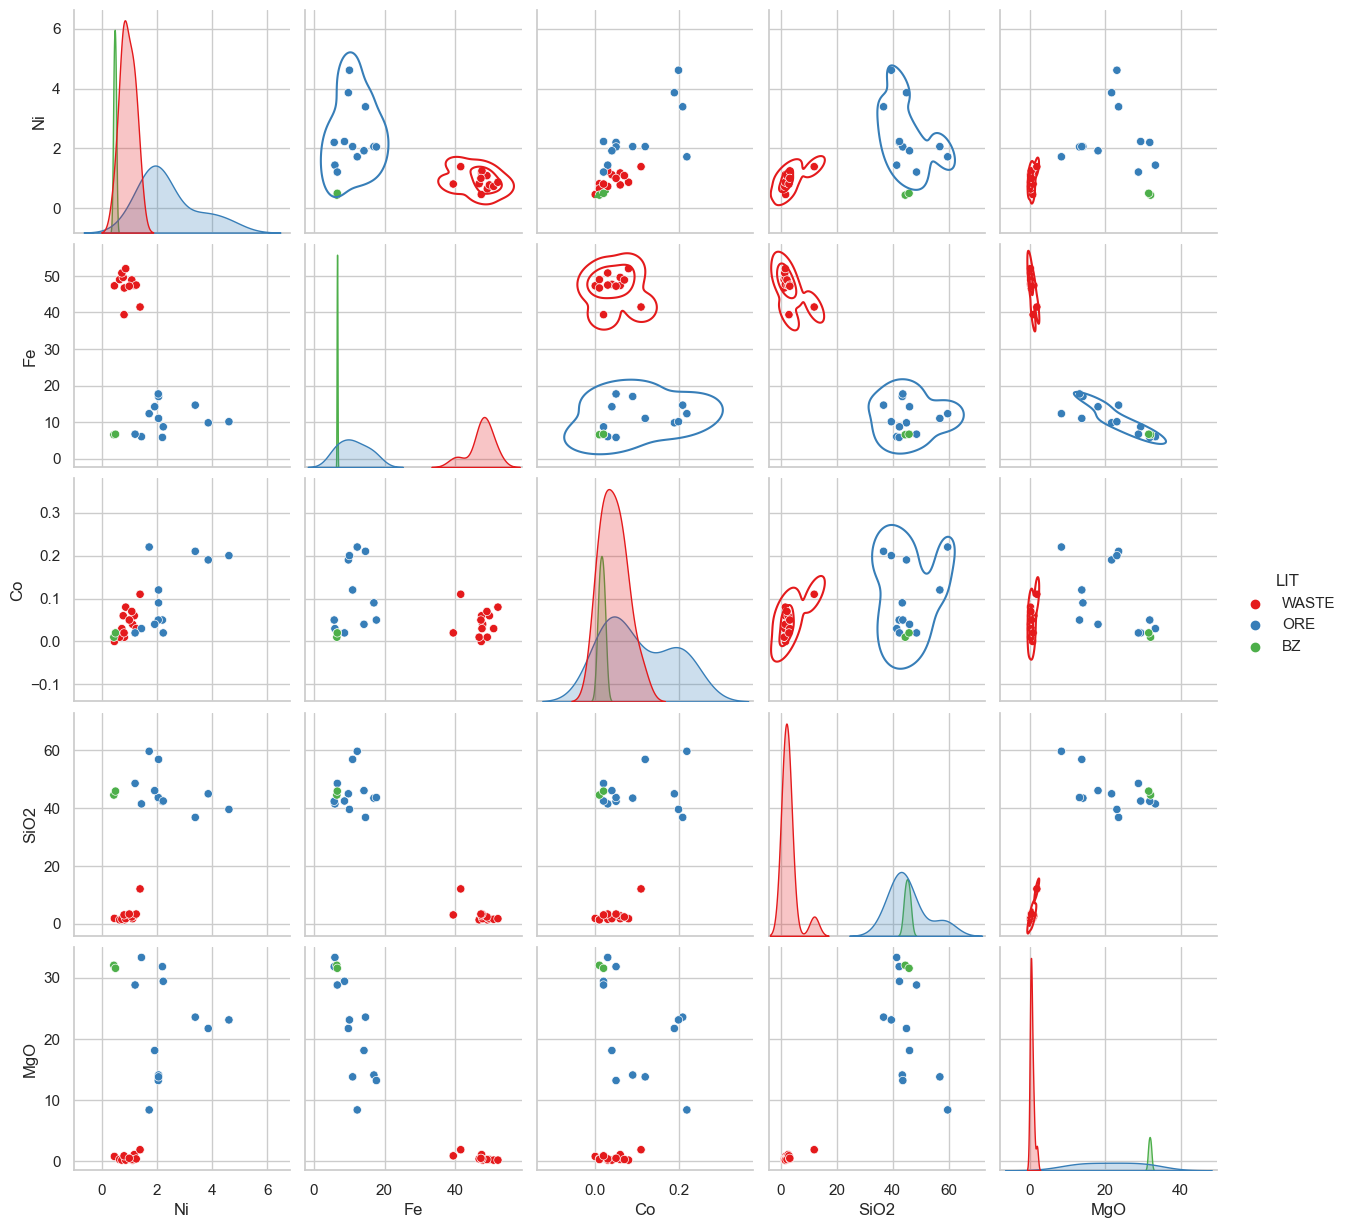

In [85]:
# Creating pairplot
sbn.set_theme(style="whitegrid")
pair075 = sbn.pairplot(data=plot075, palette='Set1', hue='LIT')
pair075.map_upper(sbn.kdeplot, n_levels=3, color='gray', warn_singular=False)
plt.show()

By using the pair plot, the company can see the relationship of assay results between one another. An interesting thing can bee seen in this figures is that Waste is relatively clustered from the other lithologies.

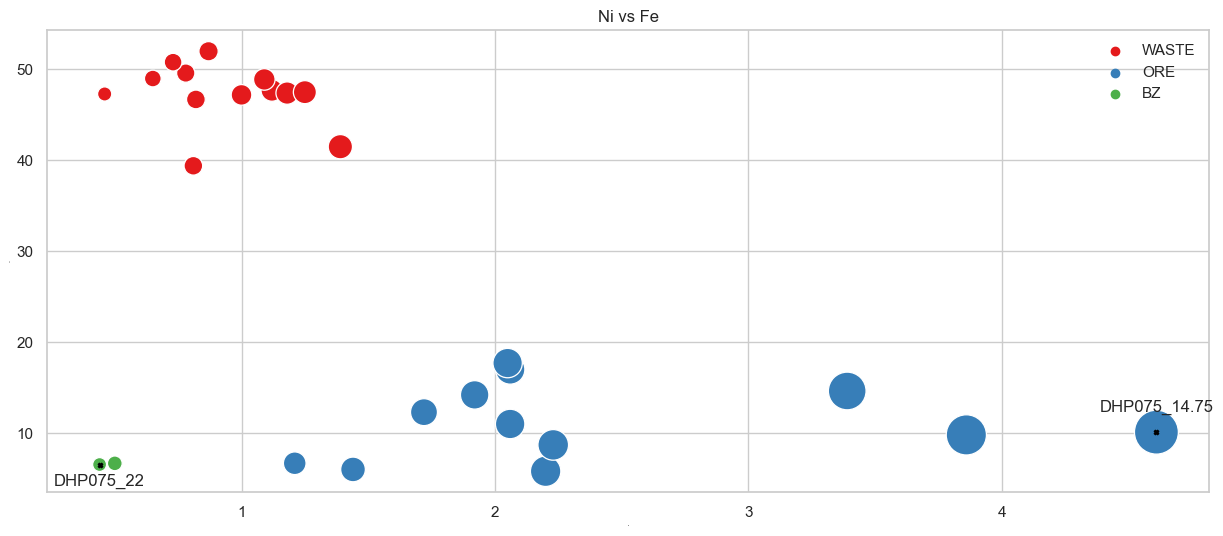

In [86]:
# Styling the plot
plt.figure(figsize=(15, 6))
plt.title("Ni vs Fe")
plt.xlabel('Ni', fontsize=1)
plt.ylabel('Fe', fontsize=1)
sbn.set_context('notebook', font_scale=1)
sbn.set_theme(style="whitegrid")

# Creating scatterplot
sbn.scatterplot(data=DHP075, y='Fe', x='Ni', hue='LIT', size='Ni', sizes=(100, 1000), palette='Set1')

# Finding the furthest dots on each x and y axis
highestni = DHP075.loc[DHP075['Ni'].idxmax()]
lowestni = DHP075.loc[DHP075['Ni'].idxmin()]

# Adding marker and label for the lowest and highest Ni
plt.scatter(highestni['Ni'], highestni['Fe'],
            color='black', marker='X', s=10)
plt.annotate(highestni['SAMID'], (highestni['Ni'], highestni['Fe']),
             textcoords="offset points", xytext=(0,15), ha='center')
plt.scatter(lowestni['Ni'], lowestni['Fe'],
            color='black', marker='X', s=10)
plt.annotate(lowestni['SAMID'], (lowestni['Ni'], lowestni['Fe']),
             textcoords="offset points", xytext=(0,-15), ha='center')

# Customizing the legend for lithology
handles, labels = plt.gca().get_legend_handles_labels()
dot_labels = DHP075['LIT'].unique()

filtered_handles = [h for h, label in zip(handles, labels) if label in dot_labels]
filtered_labels = [label for label in labels if label in dot_labels]

plt.gca().legend(filtered_handles, filtered_labels, loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

Now, after seeing the general correlation between one another, the company wanted to see the correlation only between Ni and Fe. Scatterplot shows relatively Ore has high Ni and low Fe while Waste is the opposite. It also can be noted dots with sample name of highest and lowest Ni value.

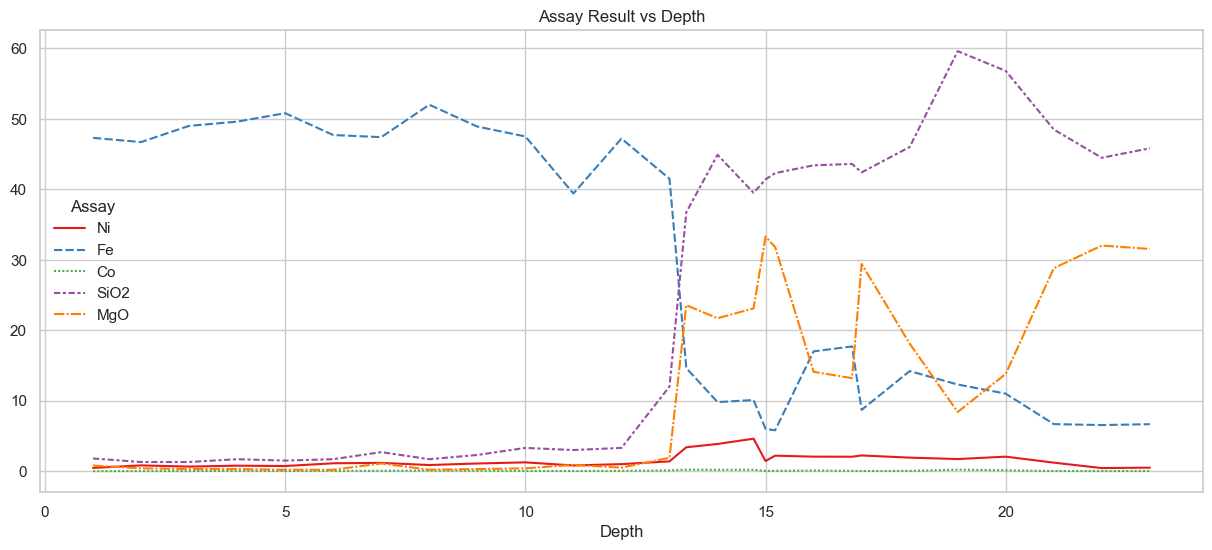

In [87]:
# Creating lineplot
plt.figure(figsize=(15, 6))
sbn.lineplot(data=plot075, palette='Set1')
sbn.set_theme(style="whitegrid")
plt.title("Assay Result vs Depth")
plt.xlabel("Depth")
plt.legend(title="Assay")
plt.show()

At certain depth, the value of Fe relatively drops while SiO2 and MgO rises as visualized in the figure above.